# Analysis of the evaluation result of weather sonification

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from model.WeatherMusicAssociation import WeatherMusicAssociationModel
from music21 import converter
from tqdm.notebook import tqdm
from common import common


In [2]:
common.init_notebook()

In [3]:
out_dir = common.data_path("output")
midi_dir = common.data_path("midi_for_evaluation_2")

In [4]:
# The palette name to be used by the seaborn charts.
palette="muted"

In [5]:
key_encoding = "onehot"

model = WeatherMusicAssociationModel(key_encoding)
model.load_trained_models()
df = model.load_weather_music_features()

In [6]:
df

,mean_note_duration,tempo,pitch_range,mode,Valence,Arousal,date_time,mode_str,c5_index,c5_index_int
0,0.801665,84.783600,32.685333,7.409249e-08,0.303359,0.333513,2023010100,minor,8,8
1,0.892700,90.498955,36.452339,1.812224e-07,0.292065,0.306493,2023010101,minor,8,8
2,1.210215,111.251556,37.449757,2.191578e-08,0.231717,0.272429,2023010102,minor,8,8
3,1.423223,93.965042,43.981491,5.226931e-06,0.238983,0.199409,2023010103,minor,8,8
4,0.794020,64.850029,50.804333,1.256336e-02,0.349039,0.256937,2023010104,minor,8,8
...,...,...,...,...,...,...,...,...,...,...
8743,0.870975,84.551613,42.649117,4.576354e-06,0.305307,0.279726,2023123119,minor,8,8
8744,0.726595,73.893082,41.517651,6.868765e-06,0.328292,0.303816,2023123120,minor,8,8
8745,0.461680,83.394463,26.184765,8.740672e-09,0.353075,0.426765,2023123121,minor,8,8
8746,0.741065,72.206558,44.582779,4.050378e-05,0.331978,0.287380,2023123122,minor,8,8


In [7]:
# Check the mode of generated weather music.
weather_10_df = None

mydf = pd.read_csv(f"{midi_dir}/samples.csv")
if weather_10_df is None:
  weather_10_df = mydf
else:
  weather_10_df = pd.concat([weather_10_df, mydf])


In [8]:
# joined_df = weather_10_df.join(df.set_index('date_time'), on='date_time', how='left')
joined_df = weather_10_df

In [9]:
joined_df

,Unnamed: 0.1,Unnamed: 0,date_time,y,x,cloud_amount_of_high_cloud,cloud_amount_of_low_cloud,cloud_amount_of_medium_cloud,cloud_amount_of_total_cloud,fog_fraction_at_screen_level,...,pattern,mean_note_duration,tempo,pitch_range,mode,Valence,Arousal,mode_str,c5_index,c5_index_int
0,0,2627,2023042017,3,6,0.000000,0.000000,0.000000,0.000000,0.0000,...,Comfortable,0.646344,136.581100,47.625992,1.000000e+00,0.730600,0.580496,major,2,2
1,1,361,2023011602,3,6,0.085938,1.000000,1.000000,1.000000,1.0000,...,High_snow,0.724059,70.209381,45.843777,1.073623e-04,0.338251,0.284255,minor,8,8
2,2,3008,2023050615,3,6,0.992188,0.984375,0.953125,1.000000,0.0000,...,High_rain,0.591609,90.646172,57.845589,1.416608e-04,0.470177,0.466524,minor,3,3
3,3,371,2023011612,3,6,0.000000,0.000000,0.000000,0.000000,0.0000,...,Cold_windy,0.512676,94.525558,49.722778,9.999999e-01,0.633721,0.545055,major,8,8
4,4,1674,2023031123,3,6,0.906250,1.000000,1.000000,1.000000,0.0000,...,High_snow,1.293620,102.554451,39.283260,1.697920e-07,0.231747,0.237532,minor,8,8
5,5,362,2023011603,3,6,0.000000,1.000000,1.000000,1.000000,1.0000,...,High_snow,0.887322,77.553589,45.880775,5.879494e-05,0.313872,0.260168,minor,8,8
6,6,437,2023011907,3,6,0.000000,0.015625,0.000000,0.015625,0.0000,...,Cold_windy,0.813245,121.977371,46.031467,3.697211e-08,0.437538,0.518402,minor,3,3
7,7,2315,2023040717,3,6,0.000000,0.000000,0.000000,0.000000,0.0000,...,Comfortable,0.595149,150.700562,48.319393,1.000000e+00,0.756370,0.650441,major,2,2
8,8,4050,2023061901,3,6,0.578125,0.898438,1.000000,1.000000,0.1250,...,High_rain,0.688957,75.287544,35.533302,5.487529e-07,0.326361,0.333320,minor,8,8
9,9,439,2023011909,3,6,0.000000,0.000000,0.000000,0.000000,0.0000,...,Cold_windy,0.455220,74.412262,49.752361,9.999976e-01,0.569137,0.467852,major,8,8


In [10]:
files = sorted(os.listdir(midi_dir))
midi_data_list = [converter.parse(os.path.join(midi_dir,file)) for file in tqdm(files) if file.endswith(".mid")]

analyzed_keys = [s.analyze('key') for s in tqdm(midi_data_list)]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [11]:
joined_df.shape

(20, 37)

In [12]:
joined_df['reanalysed_mode'] = [k.mode for k in analyzed_keys]
joined_df['reanalysed_mode_correlationCoefficient'] = [k.correlationCoefficient for k in analyzed_keys]


In [13]:
joined_df.to_csv(f"{out_dir}/joined_df_of_50_samples.csv")

In [14]:
joined_df[['mode_str', 'reanalysed_mode', 'reanalysed_mode_correlationCoefficient']]

,mode_str,reanalysed_mode,reanalysed_mode_correlationCoefficient
0,major,major,0.586644
1,minor,major,0.772335
2,minor,minor,0.819361
3,major,major,0.878921
4,minor,major,0.830077
5,minor,major,0.796397
6,minor,minor,0.765069
7,major,major,0.722323
8,minor,minor,0.554872
9,major,major,0.840418


In [15]:
joined_df[joined_df['mode_str'] == joined_df['reanalysed_mode']]

,Unnamed: 0.1,Unnamed: 0,date_time,y,x,cloud_amount_of_high_cloud,cloud_amount_of_low_cloud,cloud_amount_of_medium_cloud,cloud_amount_of_total_cloud,fog_fraction_at_screen_level,...,tempo,pitch_range,mode,Valence,Arousal,mode_str,c5_index,c5_index_int,reanalysed_mode,reanalysed_mode_correlationCoefficient
0,0,2627,2023042017,3,6,0.000000,0.000000,0.000000,0.000000,0.000,...,136.581100,47.625992,1.000000e+00,0.730600,0.580496,major,2,2,major,0.586644
2,2,3008,2023050615,3,6,0.992188,0.984375,0.953125,1.000000,0.000,...,90.646172,57.845589,1.416608e-04,0.470177,0.466524,minor,3,3,minor,0.819361
3,3,371,2023011612,3,6,0.000000,0.000000,0.000000,0.000000,0.000,...,94.525558,49.722778,9.999999e-01,0.633721,0.545055,major,8,8,major,0.878921
6,6,437,2023011907,3,6,0.000000,0.015625,0.000000,0.015625,0.000,...,121.977371,46.031467,3.697211e-08,0.437538,0.518402,minor,3,3,minor,0.765069
7,7,2315,2023040717,3,6,0.000000,0.000000,0.000000,0.000000,0.000,...,150.700562,48.319393,1.000000e+00,0.756370,0.650441,major,2,2,major,0.722323
8,8,4050,2023061901,3,6,0.578125,0.898438,1.000000,1.000000,0.125,...,75.287544,35.533302,5.487529e-07,0.326361,0.333320,minor,8,8,minor,0.554872
9,9,439,2023011909,3,6,0.000000,0.000000,0.000000,0.000000,0.000,...,74.412262,49.752361,9.999976e-01,0.569137,0.467852,major,8,8,major,0.840418
12,12,2312,2023040714,3,6,0.000000,0.000000,0.000000,0.000000,0.000,...,143.679718,47.898678,1.000000e+00,0.740412,0.659386,major,2,2,major,0.732392
13,13,3954,2023061501,3,6,0.000000,0.000000,0.000000,0.000000,0.000,...,53.744015,52.793293,2.416159e-02,0.428400,0.363461,minor,8,8,minor,0.683962
14,14,1710,2023031311,3,6,0.914062,1.000000,1.000000,1.000000,0.000,...,59.351540,47.141079,3.886904e-04,0.410784,0.367314,minor,8,8,minor,0.801721


In [16]:
joined_df[joined_df['mode_str'] != joined_df['reanalysed_mode']]

,Unnamed: 0.1,Unnamed: 0,date_time,y,x,cloud_amount_of_high_cloud,cloud_amount_of_low_cloud,cloud_amount_of_medium_cloud,cloud_amount_of_total_cloud,fog_fraction_at_screen_level,...,tempo,pitch_range,mode,Valence,Arousal,mode_str,c5_index,c5_index_int,reanalysed_mode,reanalysed_mode_correlationCoefficient
1,1,361,2023011602,3,6,0.085938,1.000000,1.000000,1.000000,1.0000,...,70.209381,45.843777,1.073623e-04,0.338251,0.284255,minor,8,8,major,0.772335
4,4,1674,2023031123,3,6,0.906250,1.000000,1.000000,1.000000,0.0000,...,102.554451,39.283260,1.697920e-07,0.231747,0.237532,minor,8,8,major,0.830077
5,5,362,2023011603,3,6,0.000000,1.000000,1.000000,1.000000,1.0000,...,77.553589,45.880775,5.879494e-05,0.313872,0.260168,minor,8,8,major,0.796397
10,10,394,2023011711,3,6,0.078125,0.039062,0.046875,0.117188,0.0000,...,95.939705,36.698883,1.000000e+00,0.487559,0.256958,major,8,8,minor,0.622120
11,11,360,2023011601,3,6,0.882812,1.000000,1.000000,1.000000,0.0000,...,78.421913,63.191544,5.556066e-03,0.482478,0.455378,minor,11,11,major,0.558985
16,16,1597,2023030818,3,6,0.000000,1.000000,0.500000,1.000000,0.5625,...,93.734726,41.952518,2.451565e-06,0.231770,0.199750,minor,8,8,major,0.776760


In [17]:
# Rename weather patterns
joined_df.loc[joined_df['pattern'] == 'High_snow', 'pattern'] = 'Snow'
joined_df.loc[joined_df['pattern'] == 'High_rain', 'pattern'] = 'Rain'
joined_df.loc[joined_df['pattern'] == 'Cold_windy', 'pattern'] = 'Cold & Windy'


In [18]:
joined_df['pattern'].unique()

array(['Comfortable', 'Snow', 'Rain', 'Cold & Windy'], dtype=object)

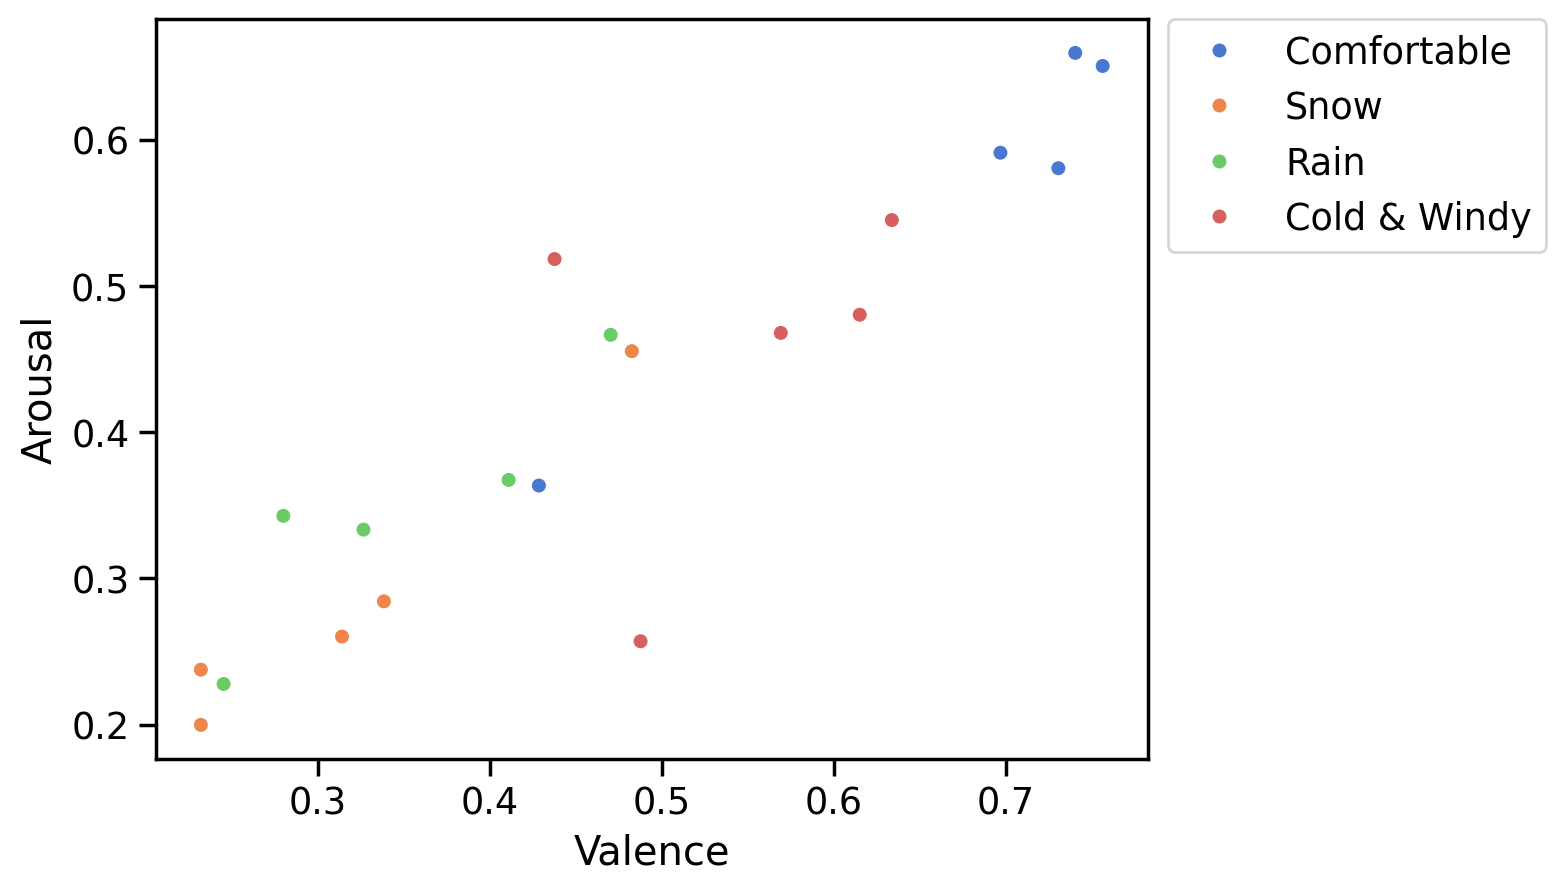

In [19]:
# Visualise the samples for evaluation on the latent emotion space.
sns.scatterplot(joined_df, x='Valence', y='Arousal', hue="pattern", palette=palette, s=30)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [20]:
joined_df[['pattern', 'Valence', 'Arousal']].groupby("pattern", as_index=False).describe()

pattern Valence                                                    \
                  count      mean       std       min       25%       50%   
0  Cold & Windy     5.0  0.548595  0.083875  0.437538  0.487559  0.569137   
1   Comfortable     5.0  0.670536  0.137097  0.428400  0.696896  0.730600   
2          Rain     5.0  0.346408  0.093002  0.244986  0.279729  0.326361   
3          Snow     5.0  0.319623  0.102886  0.231747  0.231770  0.313872   

                      Arousal                                          \
        75%       max   count      mean       std       min       25%   
0  0.615023  0.633721     5.0  0.453715  0.114179  0.256958  0.467852   
1  0.740412  0.756370     5.0  0.568979  0.120073  0.363461  0.580496   
2  0.410784  0.470177     5.0  0.347523  0.085333  0.227734  0.333320   
3  0.338251  0.482478     5.0  0.287416  0.098916  0.199750  0.237532   

                                 
        50%       75%       max  
0  0.480310  0.518402  0.545055  
1  0.591112  0.650441  0.659386  
2  0.342722  0.367314  0.466524  
3  0.260168  0.284255  0.455378

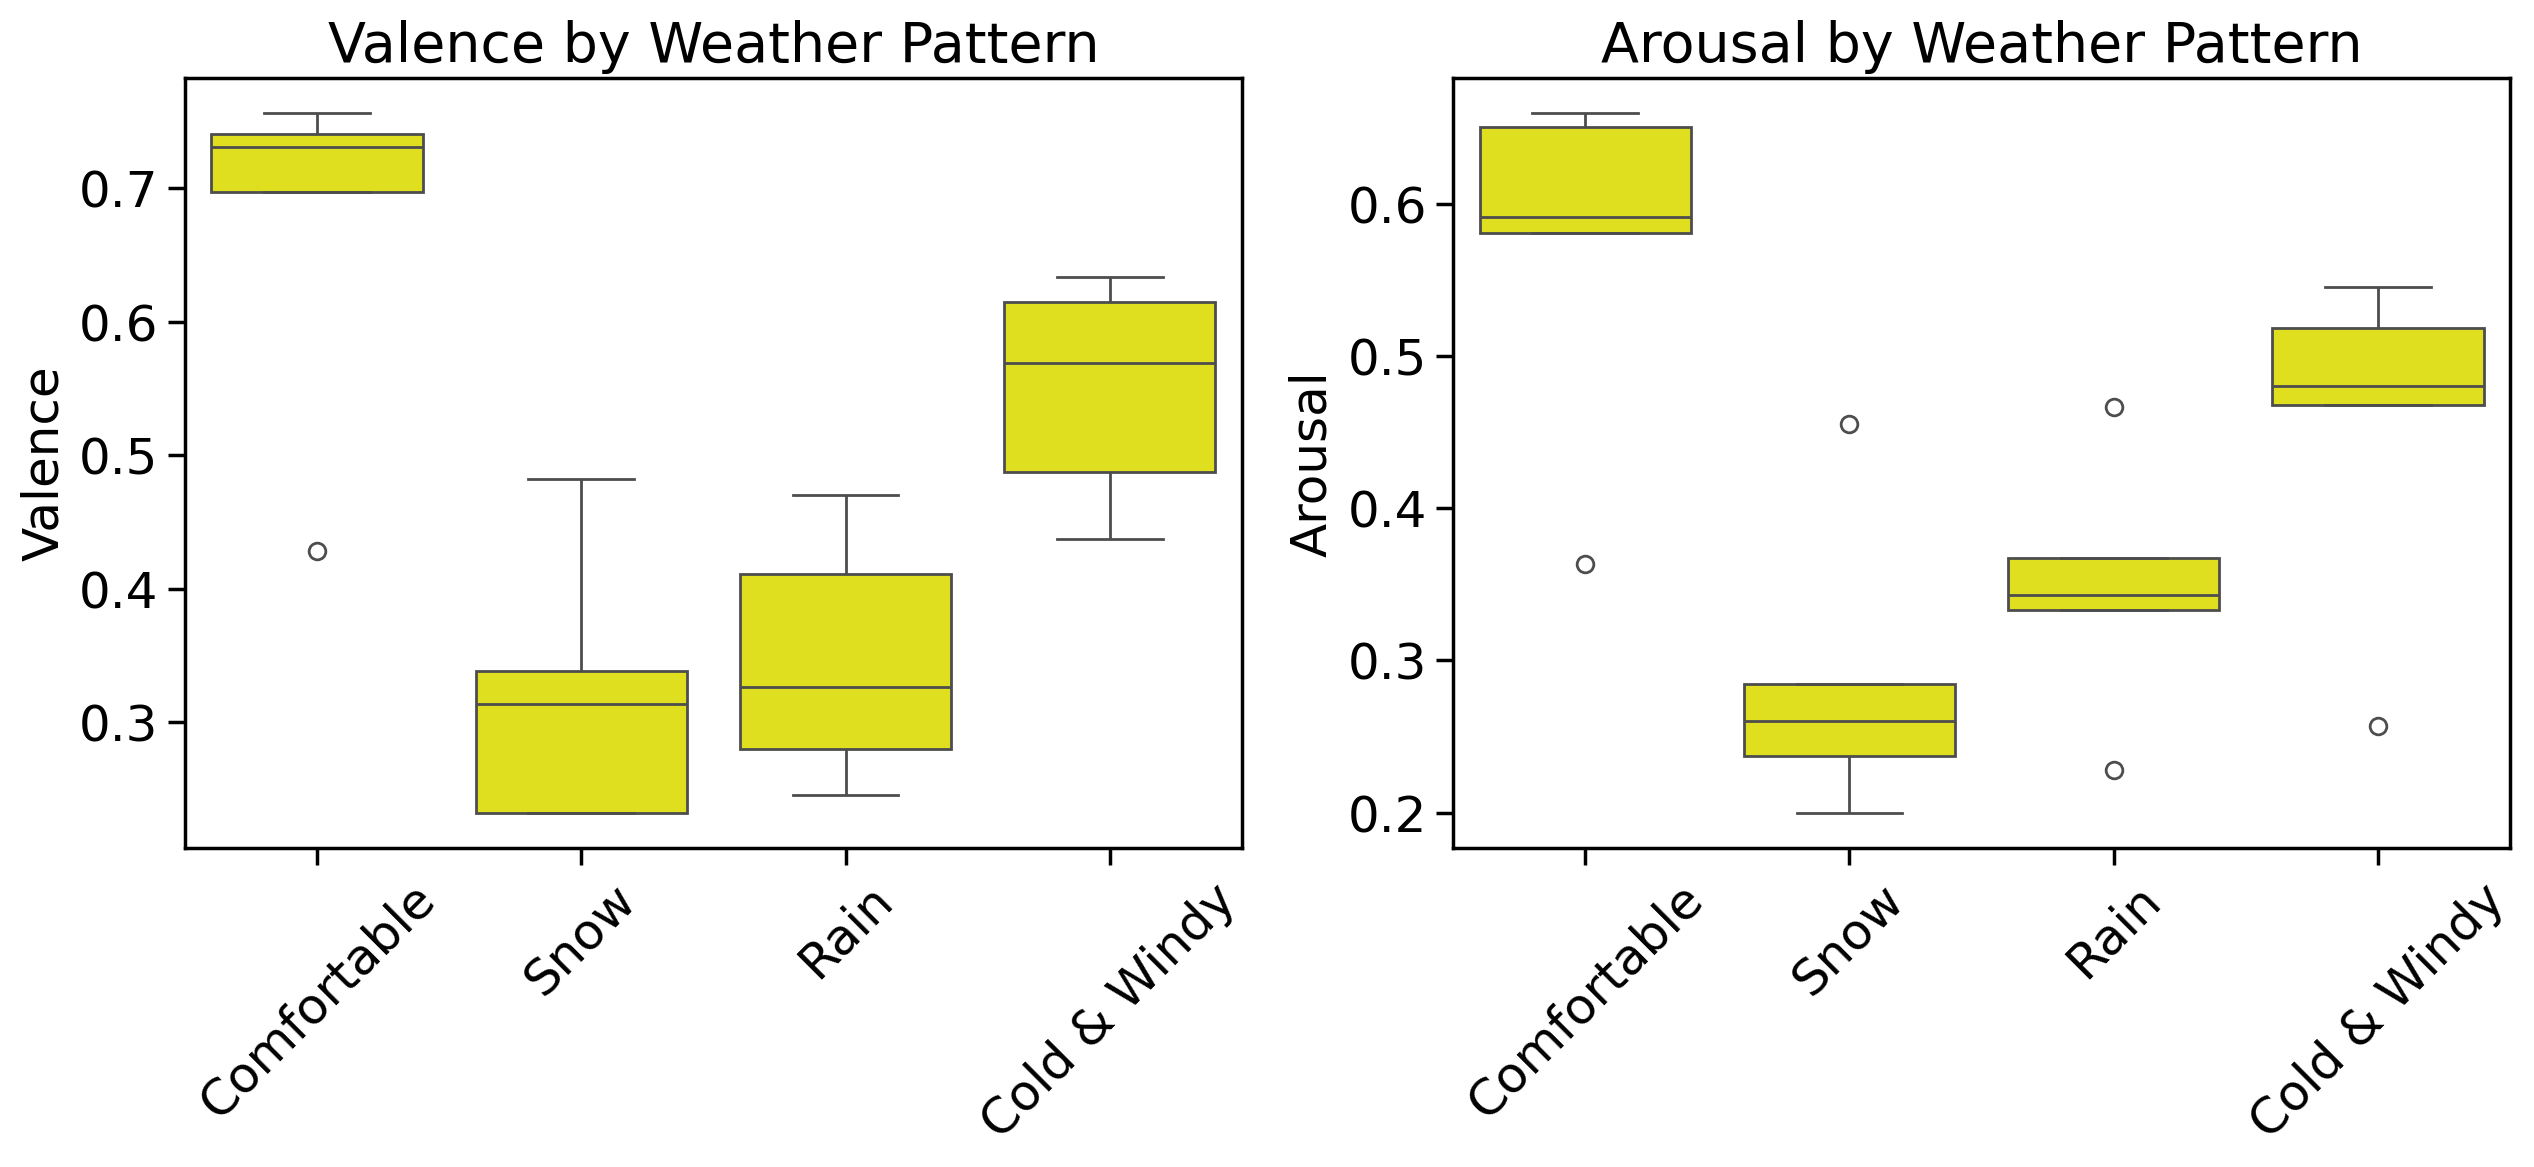

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='pattern', y='Valence', data=joined_df, ax=axes[0], color="yellow")
axes[0].tick_params(axis='x', rotation=45, labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)
# axes[0].set_xlabel('Pattern', fontsize=18)
axes[0].set_xlabel('', fontsize=18)
axes[0].set_ylabel('Valence', fontsize=18)
axes[0].set_title('Valence by Weather Pattern', fontsize=20)

sns.boxplot(x='pattern', y='Arousal', data=joined_df, ax=axes[1], color="yellow")
axes[1].tick_params(axis='x', rotation=45, labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)
# axes[1].set_xlabel('Pattern', fontsize=18)
axes[1].set_xlabel('', fontsize=18)
axes[1].set_ylabel('Arousal', fontsize=18)
axes[1].set_title('Arousal by Weather Pattern', fontsize=20)

# plt.tight_layout()
plt.show()

In [22]:
joined_df.columns.to_list()

['Unnamed: 0.1',
 'Unnamed: 0',
 'date_time',
 'y',
 'x',
 'cloud_amount_of_high_cloud',
 'cloud_amount_of_low_cloud',
 'cloud_amount_of_medium_cloud',
 'cloud_amount_of_total_cloud',
 'fog_fraction_at_screen_level',
 'pressure_at_surface',
 'relative_humidity_at_screen_level',
 'temperature_at_screen_level',
 'visibility_at_screen_level',
 'rainfall_accumulation-PT01H',
 'snowfall_accumulation-PT01H',
 'wx',
 'wy',
 'month',
 'hour',
 'cluster',
 'distance',
 'cloud_amount_of_low_mid_clouds',
 'rainfall_mm',
 'snowfall_mm',
 'wind_speed',
 'wind_direction',
 'pattern',
 'mean_note_duration',
 'tempo',
 'pitch_range',
 'mode',
 'Valence',
 'Arousal',
 'mode_str',
 'c5_index',
 'c5_index_int',
 'reanalysed_mode',
 'reanalysed_mode_correlationCoefficient']

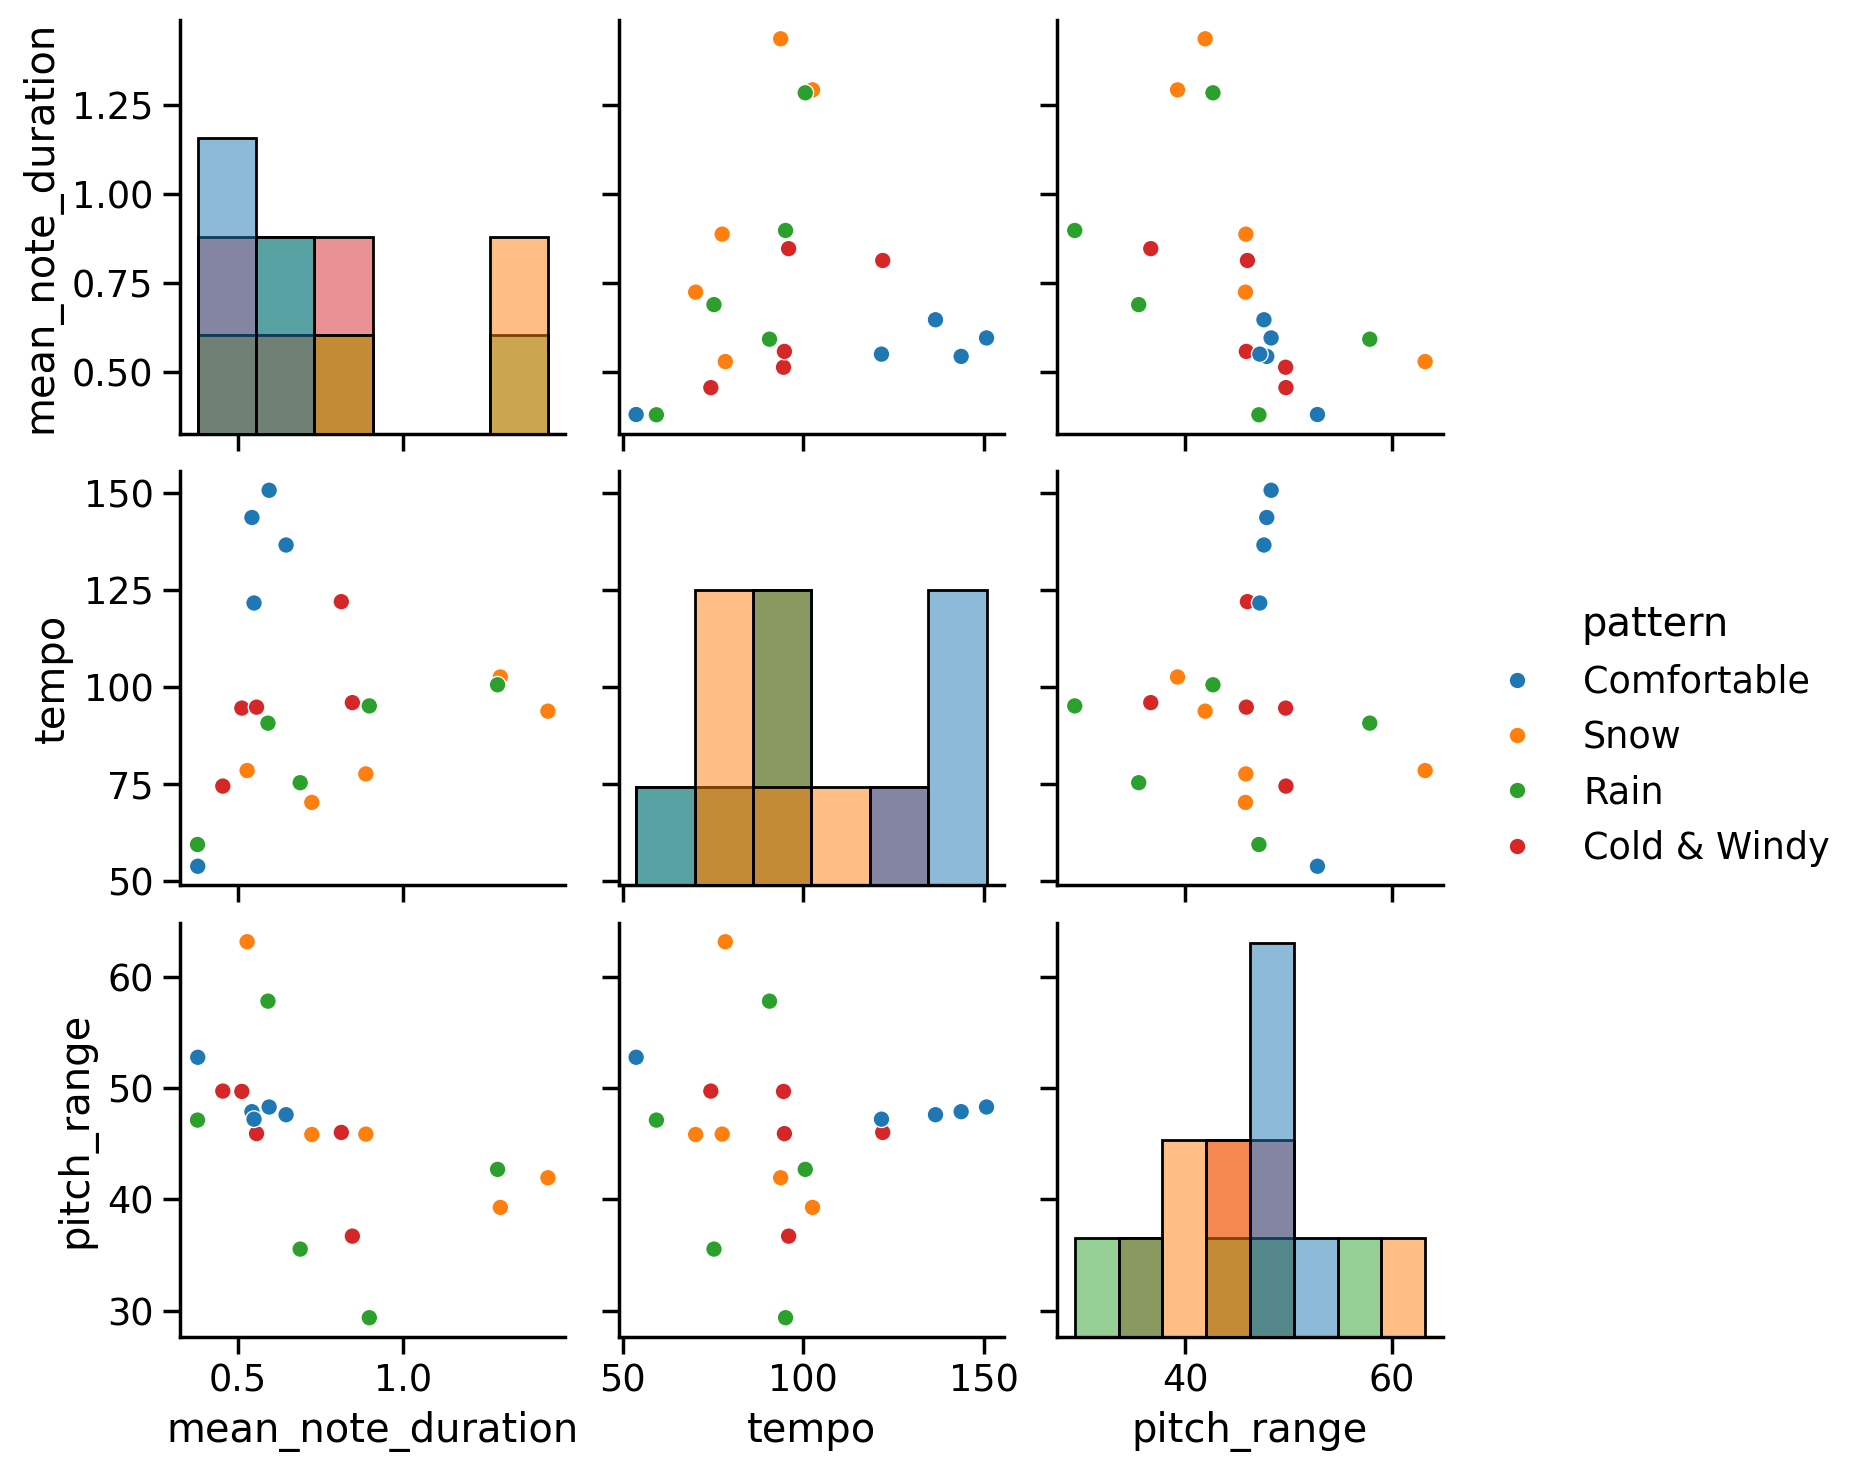

In [23]:
x_vars = ['mean_note_duration', 'tempo', 'pitch_range']
cols = x_vars + ['pattern']
sns.pairplot(joined_df[cols], hue='pattern', x_vars=x_vars, diag_kind='hist')